In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def compute_mse(y, tx, w):
    error_vector = y - tx.dot(w)
    mse = error_vector.dot(error_vector) / (2 * len(error_vector))
    return mse

In [3]:
# Computes the Root Mean Squared Error
def compute_root_mse(y, tx, w):
    mse = compute_mse(y, tx, w)
    return math.sqrt(2 * mse)

In [4]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # Construct the normal equations
    M = tx.T.dot(tx)
    v = tx.T.dot(y)
    w = np.linalg.solve(M,v)
    loss = compute_mse(y, tx, w)
    return w, loss

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [5]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # Compare with Grid Search/ Gradient Descent from last exercise
    w, loss = least_squares(y, tx)
    print(w)
    print(loss)

Test it here

In [6]:
test_your_least_squares()

[73.293922   13.47971243]
15.3858878688294


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [28]:
def compute_root_mse_old(y, tx, w):
    mse = compute_mse(y, tx, w)
    return math.sqrt(2 * mse)

In [29]:
def compute_mse(y, tx, w):
    """compute the loss by mse."""
    e = y - tx.dot(w)
    mse = e.dot(e) / (2 * len(e))
    return mse


In [30]:
def rmse_least_squares(y, tx):
    """calculate the least squares solution with rmse."""
    # Construct the normal equations
    M = tx.T.dot(tx)
    v = tx.T.dot(y)
    w = np.linalg.solve(M,v)
    return w, compute_root_mse(y, tx, w)

In [31]:
from helpers import *
def test_your_rmse_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    w, loss = rmse_least_squares(y, tx)
    print(w)
    print(loss)

In [32]:
test_your_rmse_least_squares()

[73.293922   13.47971243]
5.547231357863019


In [33]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [34]:
from plots import *

def polynomial_regression(myX, myY):
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        poly_matrix = build_poly(myX, degree)
        weights, rmse_loss = rmse_least_squares(myY, poly_matrix)
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse_loss))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737506
Processing 3th experiment, degree=7, rmse=0.24965870360907413
Processing 4th experiment, degree=12, rmse=0.2408825777169044


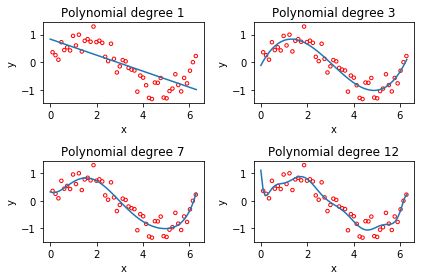

In [35]:
polynomial_regression(x, y)

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [36]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    data_count = len(y)
    indices_permutation = np.random.permutation(data_count)
    cutoff_index = int(np.floor(ratio*data_count))
    train_indices = indices_permutation[:cutoff_index]
    test_indices = indices_permutation[cutoff_index:]
    x_test = x[test_indices]
    y_test = y[test_indices]
    x_train = x[train_indices]
    y_train = y[train_indices]
    
    return x_test,x_train,y_test,y_train

Then, test your `split_data` function below.

In [37]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # Split data
    x_test, x_train, y_test, y_train = split_data(x, y, ratio, seed)
    # ***************************************************
    # form train and test data with polynomial basis function
    # ***************************************************
    x_train_poly = build_poly(x_train, degree)    
    x_test_poly = build_poly(x_test, degree)
    # ***************************************************
    # calcualte weight through least square.
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively
    # ***************************************************
    weight = least_squares(y_train, x_train_poly)

    # calculate RMSE for train and test data.
    rmse_tr = np.sqrt(2 * compute_mse(y_train, x_train_poly, weight))
    rmse_te = np.sqrt(2 * compute_mse(y_test, x_test_poly, weight))
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [38]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

ValueError: setting an array element with a sequence.

# 3 Ridge Regression
Please fill in the function below.

In [52]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    lmbd = 2*tx.shape[0]*lambda_
    M = tx.T.dot(tx) + lmbd * np.indentity(tx.shape[1])
    v = tx.T.dot(y)
    w = np.linalg.solve(M,v)
    return w, compute_mse(y, tx, w)

In [53]:
def rmse_ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    lmbd = 2*tx.shape[0]*lambda_
    M = tx.T.dot(tx) + lmbd * np.identity(tx.shape[1])
    v = tx.T.dot(y)
    w = np.linalg.solve(M,v)
    return w, compute_root_mse(y, tx, w)

In [59]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # split the data, and return train and test data
    x_test, x_train, y_test, y_train = split_data(x, y, ratio, seed)
    # form train and test data with polynomial basis function
    x_train_poly = build_poly(x_train, degree)    
    x_test_poly = build_poly(x_test, degree) 

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression with a given lambda
        w_tr, rmse_loss_tr = rmse_ridge_regression(y_train, x_train_poly, lambda_)
        w_te, rmse_loss_te = rmse_ridge_regression(y_test, x_test_poly, lambda_)
        rmse_tr.append(rmse_loss_tr)
        rmse_te.append(rmse_loss_te)
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.225
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.226
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.226
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.227
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.227
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.228
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.228
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.228
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.228
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.229
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.232
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.241
proportion=0.5, degree=7, lambda=0.193, 

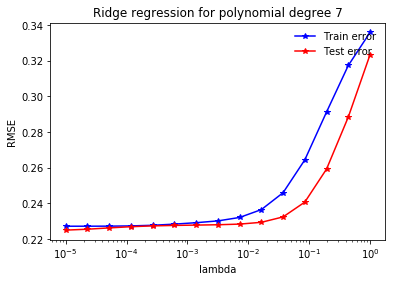

In [55]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)